### Relation between Socioeconimic Factor, Age, Sex and Suicide Rates

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Load dataset
data = pd.read_csv('Data/suicide_rates_1990-2022.csv')

In [54]:
print("Shape = ", data.shape)
print('\n')
print(data.head())
print('\n')
print("Columns = ", data.columns)

data.dropna(subset=['SuicideCount'], inplace=True)
data.isna().any()

Shape =  (118096, 18)


  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.8

RegionCode                      False
RegionName                      False
CountryCode                     False
CountryName                     False
Year                            False
Sex                             False
AgeGroup                        False
Generation                      False
SuicideCount                    False
CauseSpecificDeathPercentage     True
DeathRatePer100K                 True
Population                       True
GDP                              True
GDPPerCapita                     True
GrossNationalIncome              True
GNIPerCapita                     True
InflationRate                    True
EmploymentPopulationRatio        True
dtype: bool

In [5]:
# Descriptive statistics
data.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [6]:
# Number of Suicides by resion
data.groupby(['RegionName']).sum(numeric_only=True)['SuicideCount']

RegionName
Africa                               15592.0
Asia                               1665543.0
Central and South America           748702.0
Europe                             3624527.0
North America and the Caribbean    1363995.0
Oceania                              96330.0
Name: SuicideCount, dtype: float64

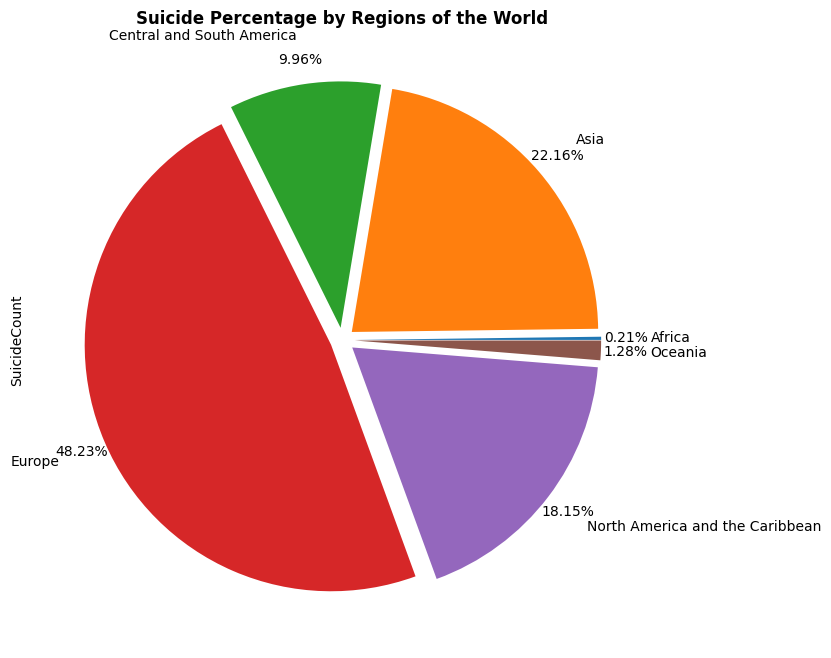

In [7]:
# Plot Suicide Percentage by Region
explode = np.full(len(data['RegionName'].unique()), 0.05)
data.groupby(['RegionName']).sum(numeric_only=True).plot.pie(
    y='SuicideCount', 
    figsize=(15,8), 
    autopct='%.2f%%', 
    explode=explode,
    pctdistance=1.1, 
    labeldistance=1.2
    )
plt.title("Suicide Percentage by Regions of the World", fontweight="bold")
plt.legend().remove()
plt.show()

In [37]:
# Percentage of Suicides by country
by_country = data.groupby(['CountryName']).sum(numeric_only=True)
count_sum = by_country['SuicideCount'].sum()
by_country['Percentage'] = by_country['SuicideCount'].apply(lambda x: (x/count_sum)*100)

print("Percentage of Suicides by Country")
by_country['Percentage'].sort_values(ascending=False)

Percentage of Suicides by Country


CountryName
Russian Federation          16.719787
United States of America    15.499417
Japan                       10.870550
Germany                      4.498350
Republic of Korea            4.338436
                              ...    
Grenada                      0.000439
Saint Kitts and Nevis        0.000186
Antigua and Barbuda          0.000173
Mayotte                      0.000160
Iraq                         0.000133
Name: Percentage, Length: 117, dtype: float64

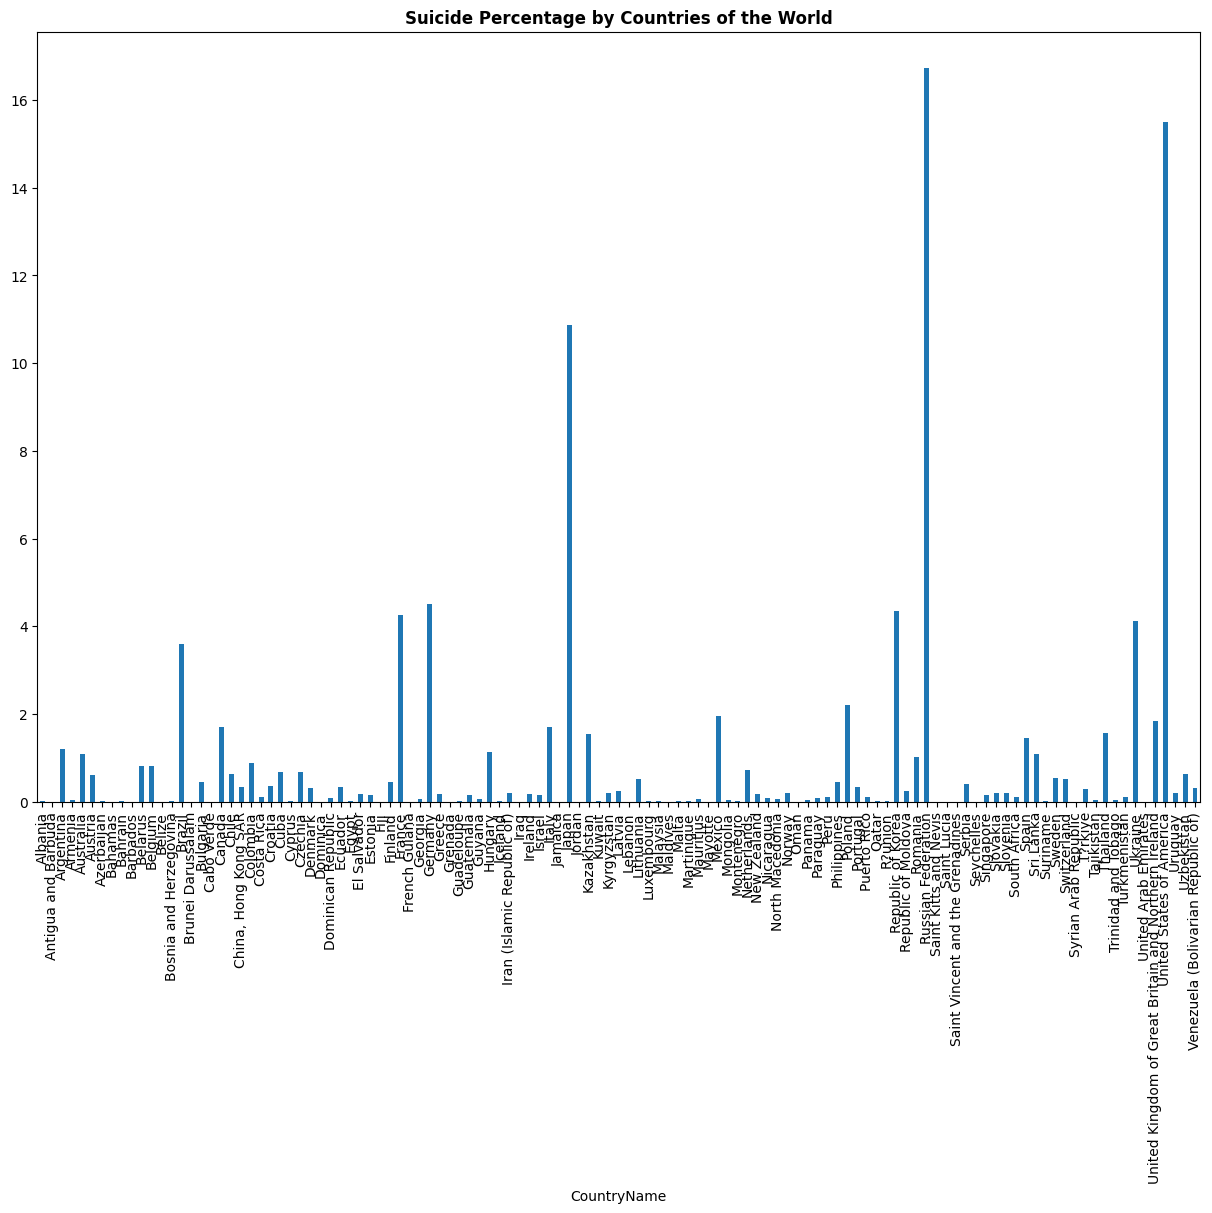

In [38]:
# Plot Suicide Percentage by country
by_country['Percentage'].plot(
    kind='bar',
    figsize=(15,10)
    )
plt.title("Suicide Percentage by Countries of the World", fontweight="bold")
plt.legend().remove()
plt.show()

<AxesSubplot: xlabel='Year'>

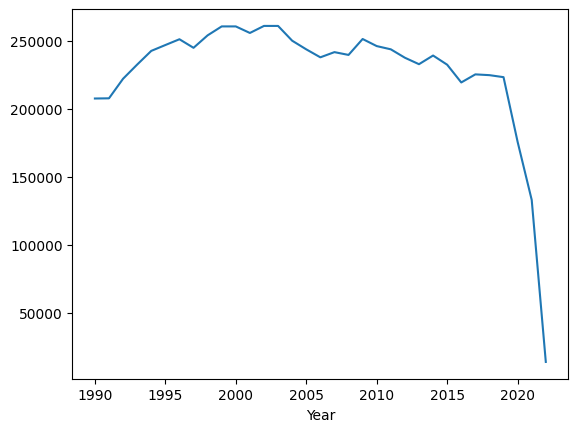

In [59]:
by_year = data.groupby(['Year']).sum(numeric_only=True)['SuicideCount']
by_year.plot(kind='line')

In [60]:
by_year

Year
1990    207445.0
1991    207584.0
1992    221963.0
1993    232369.0
1994    242419.0
1995    246721.0
1996    250971.0
1997    244684.0
1998    253835.0
1999    260404.0
2000    260399.0
2001    255585.0
2002    260762.0
2003    260753.0
2004    249909.0
2005    243557.0
2006    237695.0
2007    241510.0
2008    239457.0
2009    251156.0
2010    245953.0
2011    243574.0
2012    237397.0
2013    232651.0
2014    239013.0
2015    232275.0
2016    219232.0
2017    225172.0
2018    224599.0
2019    223129.0
2020    175606.0
2021    132955.0
2022     13955.0
Name: SuicideCount, dtype: float64